## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [70]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [71]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

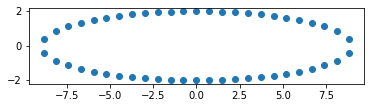

In [72]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [73]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

## Code Implementation:

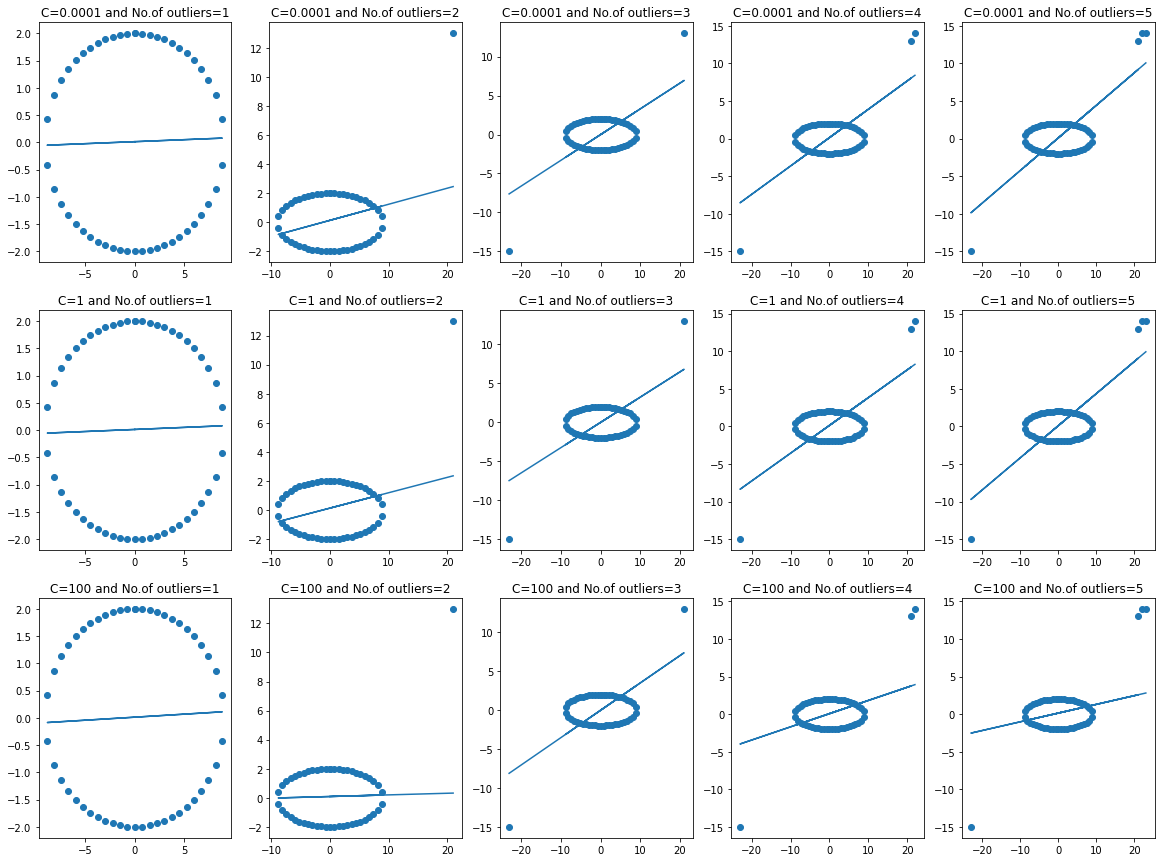

In [74]:
# Aplha values(lambda-reg values as per the lecture notes)
# SGD regressor will take squared loss by default, so its a linear regression implentation
# Random state for generating same set of data everytime
Ci = [0.0001, 1, 100]
outlrs = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
count = 1
plt.figure(figsize = (20,15))
for i in Ci:
    outs = 1
    X_mod = X.copy()
    Y_mod = Y.copy()
    for j in outlrs:
        plt.subplot(3,5,count)
        X_mod = np.append(X_mod,j[0])
        Y_mod = np.append(Y_mod,j[1])
        lin_model = SGDRegressor(alpha=i, eta0=0.001, learning_rate='constant',random_state=15)
        # X should be reshaped as we have only 1 feature it should be converted to n*1 type
        # Y will be taken by default as n*1
        lin_model.fit(X_mod.reshape(-1,1),Y_mod)
        plt.title(f"C={i} and No.of outliers={outs}")
        plt.scatter(X_mod,Y_mod)
        # As its a regression problem, directly we can use predicted y values for drawing a plane
        # In 8A, as its a classification problem, declared function for drawing a hyper plane
        plt.plot(X_mod,lin_model.predict(X_mod.reshape(-1,1)))
        outs+=1 
        count += 1

**Observations:**<br>
*1. At higher value of C(C=100), i.e, as per the notes - lamda value is low, and exactly in the 3rd set my predicted plane tends to be changing on each outlier addition and causing overfitting problem here.*<br>
*2. At lower value of C(C=0.0001), i.e, as per theory - lambda value is more, and due to raise in the regularisation term value, its making a underfit problem where hyper plane is not all bothering about the training data an making simpler assumptions without taking training data into consideration*<br>
*3. At medium value of C(C=1), hyper plane is little bit chnaging on adding the outliers but not completely, this is the ideal case where it should be tug of war between reg.term and loss term and should be able to balance it even on addition of outliers data*